## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [2]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [29]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1 = 0.1, l2 = 0.01):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                  activation='relu',
                                  name='hidden_layer'+str(i+1),
                                  kernel_regularizer=l1_l2(l1=l1, l2=l2))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,
                                  activation='relu',
                                  name='hidden_layer'+str(i+1),
                                  kernel_regularizer=l1_l2(l1=l1,l2=l2))(x)
        
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])                                                                                                                                                
    return model

In [30]:
learning_rate = 1e-3
epochs = 50
batch_size = 256
momentum = 0.95
l1_exp = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
l2 = 0.01

In [27]:
l1_12_exp[0][0]

0.1

In [31]:
results = {}

for regulizer_ratio in l1_exp:
    keras.backend.clear_session()
    print("Experiment with Regulizer = {}".format(regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=learning_rate, nesterov=True, momentum=momentum)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    model.fit(x_train, y_train,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_name_tag = "exp-ls-{}".format(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

Experiment with Regulizer = 0
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 5s 26ms/step - loss: 15.1000 - ac

196/196 [==============================] - 5s 26ms/step - loss: 1.6123 - accuracy: 0.5242 - val_loss: 1.6856 - val_accuracy: 0.4944
Experiment with Regulizer = 0.1
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________________

196/196 [==============================] - 5s 25ms/step - loss: 18.2238 - accuracy: 0.0996 - val_loss: 18.1046 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 5s 25ms/step - loss: 18.2228 - accuracy: 0.0982 - val_loss: 18.1019 - val_accuracy: 0.1000
Experiment with Regulizer = 0.3
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense

196/196 [==============================] - 5s 27ms/step - loss: 145.3009 - accuracy: 0.0971 - val_loss: 143.8392 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 5s 27ms/step - loss: 145.2812 - accuracy: 0.0969 - val_loss: 142.8892 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 6s 31ms/step - loss: 145.2523 - accuracy: 0.0978 - val_loss: 142.9086 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 5s 26ms/step - loss: 145.2432 - accuracy: 0.0972 - val_loss: 143.0179 - val_accuracy: 0.1000
Experiment with Regulizer = 0.5
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________________________

196/196 [==============================] - 5s 27ms/step - loss: 400.5698 - accuracy: 0.0974 - val_loss: 387.9568 - val_accuracy: 0.1000
Epoch 46/50
196/196 [==============================] - 5s 28ms/step - loss: 400.4995 - accuracy: 0.0991 - val_loss: 397.6593 - val_accuracy: 0.1000
Epoch 47/50
196/196 [==============================] - 5s 28ms/step - loss: 400.5103 - accuracy: 0.0974 - val_loss: 392.3945 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 6s 28ms/step - loss: 400.4469 - accuracy: 0.0975 - val_loss: 397.1171 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 5s 26ms/step - loss: 400.3933 - accuracy: 0.0964 - val_loss: 387.3570 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 5s 26ms/step - loss: 400.3280 - accuracy: 0.0966 - val_loss: 399.2587 - val_accuracy: 0.1000
Experiment with Regulizer = 0.7
Model: "model"
_________________________________________________________________
Layer (type

196/196 [==============================] - 7s 36ms/step - loss: 781.4974 - accuracy: 0.0980 - val_loss: 752.2095 - val_accuracy: 0.1000
Epoch 44/50
196/196 [==============================] - 5s 27ms/step - loss: 781.2473 - accuracy: 0.0986 - val_loss: 774.7620 - val_accuracy: 0.1000
Epoch 45/50
196/196 [==============================] - 5s 27ms/step - loss: 781.0732 - accuracy: 0.0992 - val_loss: 758.8164 - val_accuracy: 0.1000
Epoch 46/50
196/196 [==============================] - 6s 30ms/step - loss: 781.0405 - accuracy: 0.0969 - val_loss: 768.8540 - val_accuracy: 0.1000
Epoch 47/50
196/196 [==============================] - 6s 28ms/step - loss: 780.9539 - accuracy: 0.0982 - val_loss: 777.6249 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 5s 28ms/step - loss: 780.9158 - accuracy: 0.0985 - val_loss: 779.3009 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 6s 29ms/step - loss: 780.8365 - accuracy: 0.0955 - val_loss: 744.0449

Epoch 41/50
196/196 [==============================] - 5s 27ms/step - loss: 1301.0315 - accuracy: 0.0982 - val_loss: 1233.0194 - val_accuracy: 0.1000
Epoch 42/50
196/196 [==============================] - 6s 29ms/step - loss: 1300.4816 - accuracy: 0.0965 - val_loss: 1249.7616 - val_accuracy: 0.1000
Epoch 43/50
196/196 [==============================] - 5s 27ms/step - loss: 1300.7141 - accuracy: 0.0978 - val_loss: 1195.0638 - val_accuracy: 0.1000
Epoch 44/50
196/196 [==============================] - 5s 27ms/step - loss: 1300.3595 - accuracy: 0.0989 - val_loss: 1242.6097 - val_accuracy: 0.1000
Epoch 45/50
196/196 [==============================] - 9s 47ms/step - loss: 1300.0264 - accuracy: 0.0974 - val_loss: 1212.7480 - val_accuracy: 0.1000
Epoch 46/50
196/196 [==============================] - 7s 38ms/step - loss: 1300.0552 - accuracy: 0.0978 - val_loss: 1230.2421 - val_accuracy: 0.1000
Epoch 47/50
196/196 [==============================] - 9s 48ms/step - loss: 1299.9489 - accuracy: 0.

'Code Here\n撰寫你的訓練流程並將結果用 dictionary 紀錄\n'

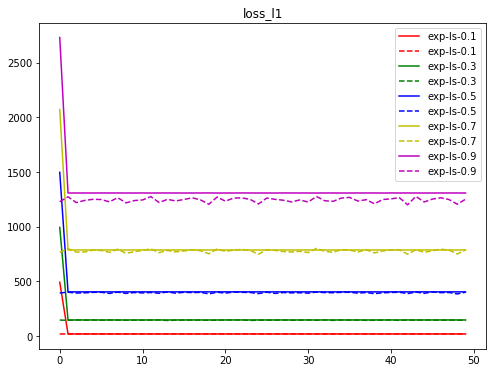

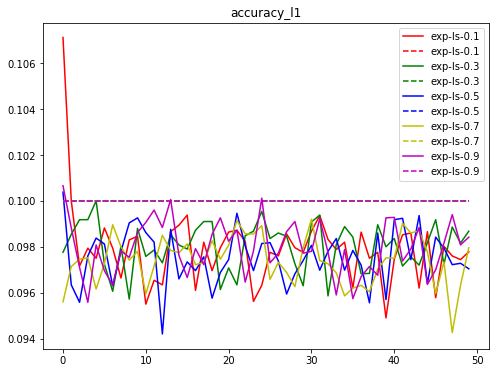

'Code Here\n將結果繪出\n'

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('loss_l1')
plt.ylim()
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('accuracy_l1')
plt.legend()
plt.show()

"""Code Here
將結果繪出
"""

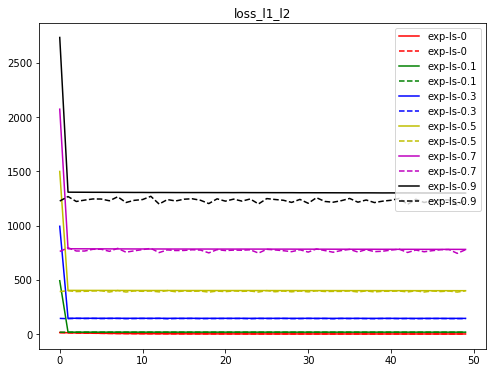

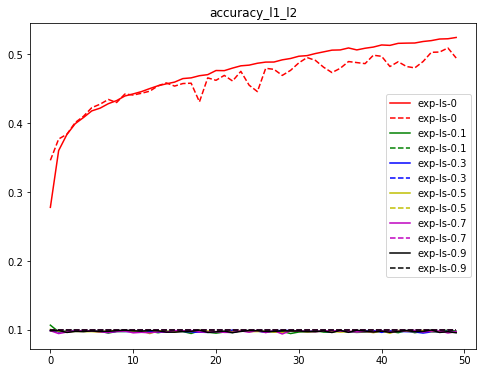

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('loss_l1_l2')
plt.ylim()
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('accuracy_l1_l2')
plt.legend()
plt.show()